# LIAR Dataset - Data Exploration
## Fake News Detection Dataset

Dataset gồm 2 cột:
- `text`: Prompt đã gom tất cả features (statement + speaker + party + topic + analysis)
- `label`: Binary classification ('true' hoặc 'false')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load Data

In [12]:
# Load datasets
label = pd.read_csv('train_labeled_10.tsv', sep='\t')
unlabel = pd.read_csv('train_unlabeled.tsv', sep='\t')
test = pd.read_csv('test2_final.tsv', sep='\t')
val = pd.read_csv('val2_final.tsv', sep='\t')

print("📊 Dataset sizes:")
print(f"Label: {len(label):,} samples")
print(f"Unlabel: {len(unlabel):,} samples")
print(f"Test:   {len(test):,} samples")
print(f"Val:    {len(val):,} samples")

📊 Dataset sizes:
Label: 10 samples
Unlabel: 10,232 samples
Test:   1,267 samples
Val:    1,284 samples


## 2. Data Overview

In [13]:
# Xem cấu trúc
print("📋 Train dataset info:")
print(label.info())
print("\n" + "="*60)
print("\n📋 Columns:")
print(label.columns.tolist())
print("\n📋 First 3 rows:")
label.head(3)

📋 Train dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10 non-null     object
 1   label   10 non-null     bool  
dtypes: bool(1), object(1)
memory usage: 218.0+ bytes
None


📋 Columns:
['text', 'label']

📋 First 3 rows:


,text,label
0,Statement: Forty percent of the Fortune 500 we...,False
1,Statement: Farouk is on fire.\nSpeaker: j-xavi...,True
2,Statement: Shutdowns are a normal part of the ...,False


## 3. Label Distribution

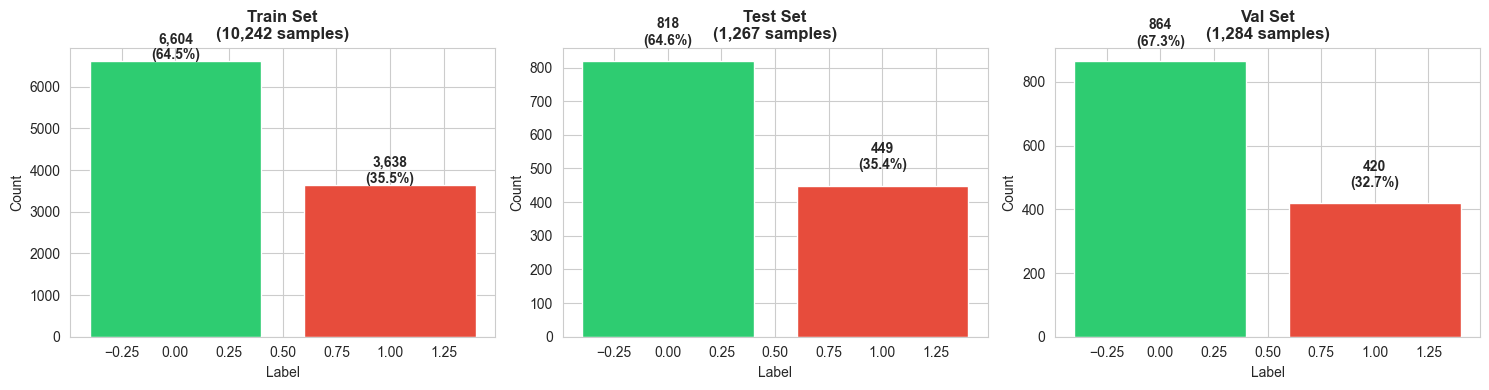


📊 Label Distribution:

Train:
label
False    6604
True     3638
Name: count, dtype: int64
Percentage:
label
False    64.479594
True     35.520406
Name: proportion, dtype: float64

Test:
label
False    818
True     449
Name: count, dtype: int64
Percentage:
label
False    64.561957
True     35.438043
Name: proportion, dtype: float64

Val:
label
False    864
True     420
Name: count, dtype: int64
Percentage:
label
False    67.28972
True     32.71028
Name: proportion, dtype: float64


In [5]:
# Label distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, (df, name) in enumerate([(train, 'Train'), (test, 'Test'), (val, 'Val')]):
    counts = df['label'].value_counts()
    axes[idx].bar(counts.index, counts.values, color=['#2ecc71', '#e74c3c'])
    axes[idx].set_title(f'{name} Set\n({len(df):,} samples)', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Label')
    axes[idx].set_ylabel('Count')
    
    # Add percentages
    for i, (label, count) in enumerate(counts.items()):
        pct = count / len(df) * 100
        axes[idx].text(i, count + 50, f'{count:,}\n({pct:.1f}%)', 
                      ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📊 Label Distribution:")
for name, df in [('Train', train), ('Test', test), ('Val', val)]:
    print(f"\n{name}:")
    print(df['label'].value_counts())
    print(f"Percentage:")
    print(df['label'].value_counts(normalize=True) * 100)

## 4. Text Length Analysis

📏 Text Length Statistics:

Train:
count    10242.000000
mean       629.104765
std        321.289155
min         65.000000
25%        470.000000
50%        598.000000
75%        742.000000
max       9661.000000
Name: text_length, dtype: float64


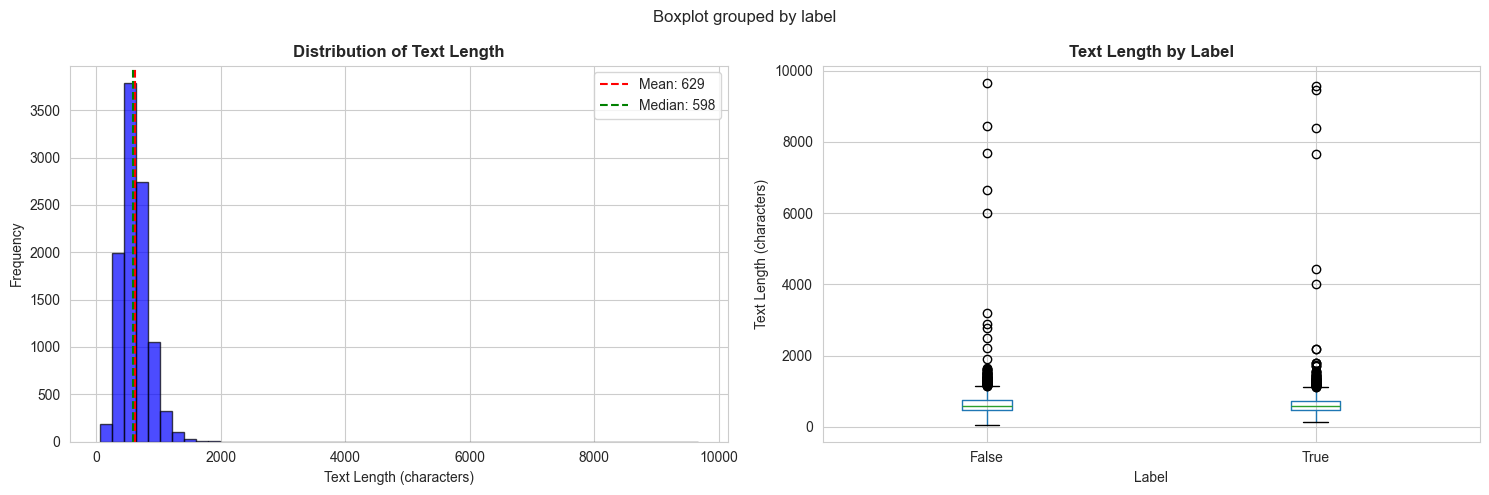

In [6]:
# Tính độ dài text
train['text_length'] = train['text'].str.len()
test['text_length'] = test['text'].str.len()
val['text_length'] = val['text'].str.len()

# Statistics
print("📏 Text Length Statistics:")
print("\nTrain:")
print(train['text_length'].describe())

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(train['text_length'], bins=50, alpha=0.7, color='blue', edgecolor='black')
axes[0].axvline(train['text_length'].mean(), color='red', linestyle='--', 
                label=f"Mean: {train['text_length'].mean():.0f}")
axes[0].axvline(train['text_length'].median(), color='green', linestyle='--',
                label=f"Median: {train['text_length'].median():.0f}")
axes[0].set_xlabel('Text Length (characters)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Text Length', fontweight='bold')
axes[0].legend()

# Box plot by label
train.boxplot(column='text_length', by='label', ax=axes[1])
axes[1].set_title('Text Length by Label', fontweight='bold')
axes[1].set_xlabel('Label')
axes[1].set_ylabel('Text Length (characters)')

plt.tight_layout()
plt.show()

## 5. Sample Examples

In [7]:
# Xem ví dụ từng label
print("=" * 80)
print("📰 EXAMPLE: TRUE Statement")
print("=" * 80)
true_sample = train[train['label'] == 'true'].iloc[0]
print(true_sample['text'])
print(f"\n✅ Label: {true_sample['label']}")

print("\n" + "=" * 80)
print("📰 EXAMPLE: FALSE Statement")
print("=" * 80)
false_sample = train[train['label'] == 'false'].iloc[0]
print(false_sample['text'])
print(f"\n❌ Label: {false_sample['label']}")

📰 EXAMPLE: TRUE Statement


IndexError: single positional indexer is out-of-bounds

## 6. Random Samples

In [8]:
# Xem random samples
print("🎲 Random Samples from Training Set:\n")

for i, row in train.sample(3).iterrows():
    print("=" * 80)
    print(f"Sample {i}")
    print("=" * 80)
    print(row['text'])
    print(f"\nLabel: {row['label']}")
    print(f"Length: {row['text_length']} characters")
    print()

🎲 Random Samples from Training Set:

Sample 7731
Statement: A former Clinton administration official and other economists agree that if you keep extending these temporary unemployment benefits, youre just going to extend joblessness even more.
Speaker: michelle-malkin (none party)
Topic: economy,pundits,stimulus

Analysis: McAuliffes ad says, "Cuccinelli wants to make all abortion illegal, even in cases of rape and incest, even to protect a womans health. "Cuccinelli is an adamant opponent of abortion, but he has consistently supported one rare exception: Allowing abortion when a mothers life is endangered by pregnancy. His position was known to McAuliffes campaign and incongruously cited in its news release announcing the ad. Its not easy to overstate Cuccinellis objections to abortion, but McAuliffes ad manages to do just that.

Label: False
Length: 792 characters

Sample 1787
Statement: President Obama has the most border patrols and border security deployed at the border of any pre

## 7. Word Count Analysis

📊 Word Count Statistics:
count    10242.000000
mean        96.833626
std         45.091581
min         10.000000
25%         71.000000
50%         92.000000
75%        116.000000
max       1142.000000
Name: word_count, dtype: float64


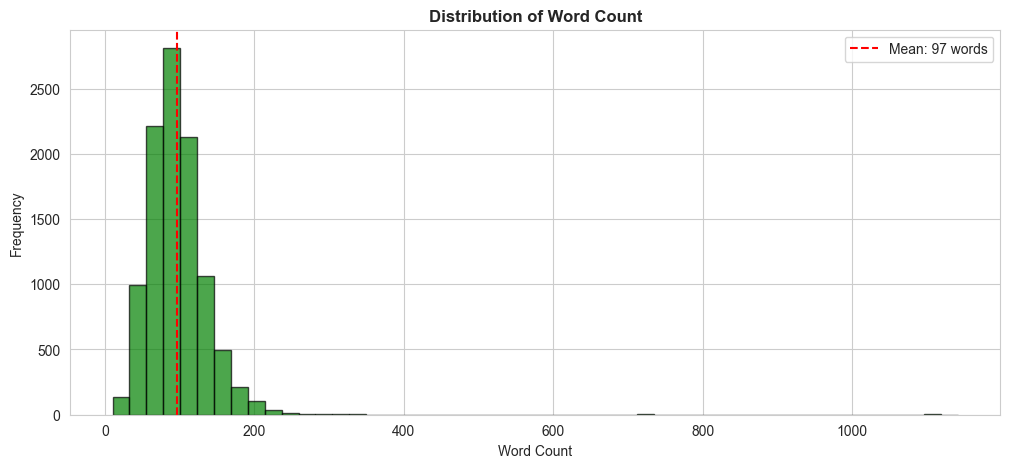

In [9]:
# Đếm số từ
train['word_count'] = train['text'].str.split().str.len()

print("📊 Word Count Statistics:")
print(train['word_count'].describe())

# Visualize
plt.figure(figsize=(12, 5))
plt.hist(train['word_count'], bins=50, alpha=0.7, color='green', edgecolor='black')
plt.axvline(train['word_count'].mean(), color='red', linestyle='--',
            label=f"Mean: {train['word_count'].mean():.0f} words")
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Word Count', fontweight='bold')
plt.legend()
plt.show()

## 8. Quick Search Function

In [10]:
def search_samples(keyword, n=3):
    """Tìm kiếm samples chứa keyword"""
    results = train[train['text'].str.contains(keyword, case=False, na=False)]
    print(f"🔍 Found {len(results)} samples containing '{keyword}'\n")
    
    for i, (idx, row) in enumerate(results.head(n).iterrows()):
        print("=" * 80)
        print(f"Result {i+1}/{min(n, len(results))}")
        print("=" * 80)
        print(row['text'][:500] + "..." if len(row['text']) > 500 else row['text'])
        print(f"\nLabel: {row['label']}")
        print()

# Example usage
search_samples('Obama', n=2)

🔍 Found 2628 samples containing 'Obama'

Result 1/2
Statement: Hillary Clinton agrees with John McCain "by voting to give George Bush the benefit of the doubt on Iran."
Speaker: barack-obama (democrat party)
Topic: foreign-policy

Analysis: Obama said he would have voted against the amendment if he had been present. So though Clinton may have "agreed" with McCain on the issue, they did not technically vote the same way on it. To say that voting for Kyl-Lieberman is "giving George Bush the benefit of the doubt on Iran" remains a contentious issue....

Label: True

Result 2/2
Statement: I'm the only person on this stage who has worked actively just last year passing, along with Russ Feingold, some of the toughest ethics reform since Watergate.
Speaker: barack-obama (democrat party)
Topic: ethics

Analysis: However, it was not that bill, but another one, sponsored by Majority Leader Harry Reid and introduced five days earlier on Jan.  4, 2007 that eventually became law. Obama was not a co

## 9. Summary Statistics

In [11]:
print("" * 80)
print("📊 DATASET SUMMARY")
print("=" * 80)

summary = pd.DataFrame({
    'Split': ['Train', 'Test', 'Val', 'Total'],
    'Samples': [len(train), len(test), len(val), len(train)+len(test)+len(val)],
    'True': [len(train[train['label']=='true']), 
             len(test[test['label']=='true']),
             len(val[val['label']=='true']),
             len(train[train['label']=='true']) + len(test[test['label']=='true']) + len(val[val['label']=='true'])],
    'False': [len(train[train['label']=='false']),
              len(test[test['label']=='false']),
              len(val[val['label']=='false']),
              len(train[train['label']=='false']) + len(test[test['label']=='false']) + len(val[val['label']=='false'])]
})

summary['% True'] = (summary['True'] / summary['Samples'] * 100).round(1)
summary['% False'] = (summary['False'] / summary['Samples'] * 100).round(1)

print(summary.to_string(index=False))
print("=" * 80)


📊 DATASET SUMMARY
Split  Samples  True  False  % True  % False
Train    10242     0      0     0.0      0.0
 Test     1267     0      0     0.0      0.0
  Val     1284     0      0     0.0      0.0
Total    12793     0      0     0.0      0.0
